EM(Expectation and Maximiaztion) 방법을 적용

GMM은 확률 기반 군집화이고 KMeans는 거리 기반 군집화 이다.

In [10]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set(font_scale=1.5)
import pandas as pd
import numpy as np

In [2]:
iris = load_iris()
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

iris_df = pd.DataFrame(iris.data, columns=feature_names)
iris_df['target'] = iris.target

In [3]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


GMM으로 군집화하기

In [4]:
from sklearn.mixture import GaussianMixture

In [5]:
gmm = GaussianMixture(n_components=3, random_state=0)
gmm.fit(iris.data)
gmm_cluster_labels = gmm.predict(iris.data)

In [6]:
iris_df['gmm_cluster'] = gmm_cluster_labels
iris_df['target'] = iris.target

iris_result = iris_df.groupby(['target'])['gmm_cluster'].value_counts()
print(iris_result)

target  gmm_cluster
0       0              50
1       1              45
        2               5
2       2              50
Name: gmm_cluster, dtype: int64


군집화가 잘 되었는지 실루엣 계수로 확인해보자

In [8]:
gmm_score_samples = silhouette_samples(iris.data, iris_df['gmm_cluster'])
iris_df['gmm_silhouette_coeff'] = gmm_score_samples
print(iris_df.groupby('gmm_cluster')['gmm_silhouette_coeff'].mean())

gmm_average_score = silhouette_score(iris.data, iris_df['gmm_cluster'])
print(gmm_average_score)

gmm_cluster
0    0.784421
1    0.429259
2    0.302522
Name: gmm_silhouette_coeff, dtype: float64
0.5011761635067201


In [9]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target,gmm_cluster,gmm_silhouette_coeff
0,5.1,3.5,1.4,0.2,0,0,0.842852
1,4.9,3.0,1.4,0.2,0,0,0.802692
2,4.7,3.2,1.3,0.2,0,0,0.818240
3,4.6,3.1,1.5,0.2,0,0,0.791922
4,5.0,3.6,1.4,0.2,0,0,0.839200


군집화가 잘 되었는지 시각화로 확인해보기
먼저 컬럼이 4개 이므로 2개로 차원을 축소해야 한다.

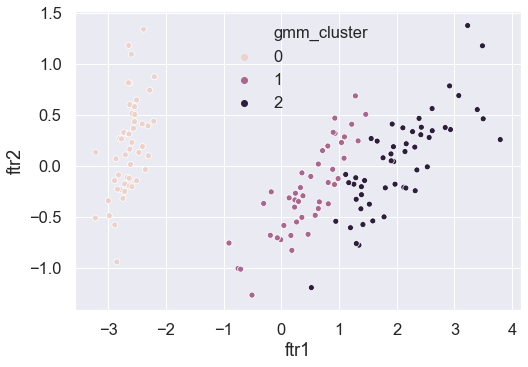

In [20]:
pca = PCA(n_components=2, random_state=0)
iris_pca = pca.fit_transform(iris.data)

iris_pca_df = pd.DataFrame(iris_pca, columns=['ftr1','ftr2'])

gmm_visualize = sns.scatterplot(iris_pca_df['ftr1'], iris_pca_df['ftr2'], hue = iris_df['gmm_cluster'])

KMeans로 군집화하기

In [21]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(iris.data)
kmeans_cluster_labels = kmeans.predict(iris.data)

iris_df['kmeans_cluster_labels'] = kmeans_cluster_labels

In [22]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target,gmm_cluster,gmm_silhouette_coeff,kmeans_cluster_labels
0,5.1,3.5,1.4,0.2,0,0,0.842852,1
1,4.9,3.0,1.4,0.2,0,0,0.802692,1
2,4.7,3.2,1.3,0.2,0,0,0.818240,1
3,4.6,3.1,1.5,0.2,0,0,0.791922,1
4,5.0,3.6,1.4,0.2,0,0,0.839200,1


군집화가 잘 되었는지 타겟과 비교해보자

In [23]:
iris_df.groupby('target')['kmeans_cluster_labels'].value_counts()

target  kmeans_cluster_labels
0       1                        50
1       2                        48
        0                         2
2       0                        36
        2                        14
Name: kmeans_cluster_labels, dtype: int64

군집화가 잘 되었는지 실루엣 스코어로 확인해보자.

In [24]:
score_samples = silhouette_samples(iris.data, iris_df['kmeans_cluster_labels'])
iris_df['kmeans_silhouette_coeff'] = score_samples
print(iris_df.groupby('kmeans_cluster_labels')['kmeans_silhouette_coeff'].mean())

kmeans_average_score = silhouette_score(iris.data, iris_df['kmeans_cluster_labels'])
print(kmeans_average_score)



kmeans_cluster_labels
0    0.451105
1    0.798140
2    0.417320
Name: kmeans_silhouette_coeff, dtype: float64
0.5528190123564091


In [25]:
print(score_samples.shape)
print(score_samples[:5])

(150,)
[0.85295506 0.81549476 0.8293151  0.80501395 0.8493016 ]


잘 군집화 됐는지 그래프로 확인해보자.
그래프로 확인할 수 있는 것은 2차원까지 이므로 pca를 써서 iris.data를 2차원으로 차원축소하고 scatterplot을 이용해서 축소된 차원들을 표시하고 hue 값에 군집화한 kmeans_cluster_labels를 넣어서 확인해보자.

In [26]:
from sklearn.decomposition import PCA

In [27]:
pca = PCA(n_components=2)
pca.fit(iris.data)
iris_pca = pca.transform(iris.data)

print(iris_pca.shape)

iris_pca_df = pd.DataFrame(iris_pca, columns=['ftr1','ftr2'])
iris_pca_df.head()

(150, 2)


,ftr1,ftr2
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755


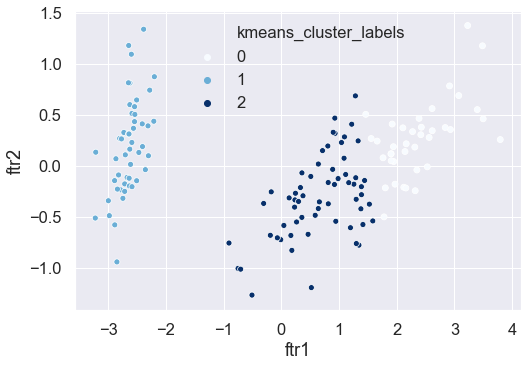

In [29]:
kmeans_visualize = sns.scatterplot(iris_pca_df['ftr1'], iris_pca_df['ftr2'], 
                                   hue=iris_df.kmeans_cluster_labels, palette='Blues' )

원형으로 분포되어 있지 않은 데이터로 Kmeans와 GMM의 군집화를 비교해보자
먼저 target과 비교

In [30]:
from sklearn.datasets import make_blobs

In [31]:
X, y =  make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=0.5, random_state=0)

transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)

cluster_df = pd.DataFrame(X_aniso, columns=['ftr1', 'ftr2'])
cluster_df['target'] = y

In [32]:
cluster_df.head()

,ftr1,ftr2,target
0,-1.671828,3.814284,0
1,0.945385,-0.901944,1
2,-0.959199,2.857152,0
3,-2.187799,3.569903,2
4,-1.967100,3.067528,2


In [33]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans_label = kmeans.fit_predict(X_aniso)

cluster_df['kmeans_label'] = kmeans_label

In [34]:
cluster_df.head()

,ftr1,ftr2,target,kmeans_label
0,-1.671828,3.814284,0,0
1,0.945385,-0.901944,1,1
2,-0.959199,2.857152,0,2
3,-2.187799,3.569903,2,0
4,-1.967100,3.067528,2,0


In [40]:
kmeans_value_counts = cluster_df.groupby('target')['kmeans_label'].value_counts()
kmeans_value_counts

target  kmeans_label
0       2                73
        0                27
1       1               100
2       0                86
        2                14
Name: kmeans_label, dtype: int64

In [36]:
gmm = GaussianMixture(n_components=3, random_state=0)
gmm_label = gmm.fit_predict(X_aniso)

cluster_df['gmm_label'] = gmm_label

In [37]:
cluster_df.head()

,ftr1,ftr2,target,kmeans_label,gmm_label
0,-1.671828,3.814284,0,0,2
1,0.945385,-0.901944,1,1,1
2,-0.959199,2.857152,0,2,2
3,-2.187799,3.569903,2,0,0
4,-1.967100,3.067528,2,0,0


In [42]:
gmm_value_counts = cluster_df.groupby('target')['gmm_label'].value_counts()
gmm_value_counts

target  gmm_label
0       2            100
1       1            100
2       0            100
Name: gmm_label, dtype: int64

최종 비교본

In [44]:
print('Kmeans 군집화와 target값 비교\n',kmeans_value_counts)
print('\n\nGMM 군집화와 target값 비교\n', gmm_value_counts)

Kmeans 군집화와 target값 비교
 target  kmeans_label
0       2                73
        0                27
1       1               100
2       0                86
        2                14
Name: kmeans_label, dtype: int64


GMM 군집화와 target값 비교
 target  gmm_label
0       2            100
1       1            100
2       0            100
Name: gmm_label, dtype: int64


실루엣 계수로 두 군집화를 비교해보자.

In [52]:
score_samples = silhouette_samples(cluster_df[['ftr1','ftr2']], cluster_df['kmeans_label'])
cluster_df['kmean_silhouette_coeff'] = score_samples
print(cluster_df.groupby('kmeans_label')['kmean_silhouette_coeff'].mean())

average_score = silhouette_score(cluster_df[['ftr1','ftr2']], cluster_df['kmeans_label'])
print('\n평균 실루엣 스코어\n',average_score)

kmeans_label
0    0.504129
1    0.804344
2    0.526644
Name: kmean_silhouette_coeff, dtype: float64

평균 실루엣 스코어
 0.6107300946094799


In [53]:
kmeans_score_samples = silhouette_samples(cluster_df[['ftr1','ftr2']], cluster_df['kmeans_label'])
cluster_df['kmean_silhouette_coeff'] = score_samples
print(cluster_df.groupby('kmeans_label')['kmean_silhouette_coeff'].mean())

average_score = silhouette_score(cluster_df[['ftr1','ftr2']], cluster_df['kmeans_label'])
print('\n평균 실루엣 스코어\n',average_score)

kmeans_label
0    0.504129
1    0.804344
2    0.526644
Name: kmean_silhouette_coeff, dtype: float64

평균 실루엣 스코어
 0.6107300946094799


In [54]:
gmm_score_samples = silhouette_samples(cluster_df[['ftr1','ftr2']], cluster_df['gmm_label'])
cluster_df['gmm_silhouette_coeff'] = score_samples
print(cluster_df.groupby('gmm_label')['gmm_silhouette_coeff'].mean())

average_score = silhouette_score(cluster_df[['ftr1','ftr2']], cluster_df['gmm_label'])
print('\n평균 실루엣 스코어\n',average_score)

gmm_label
0    0.516170
1    0.804344
2    0.511676
Name: gmm_silhouette_coeff, dtype: float64

평균 실루엣 스코어
 0.5114781075567435


시각화를 이용해서 비교해보자.

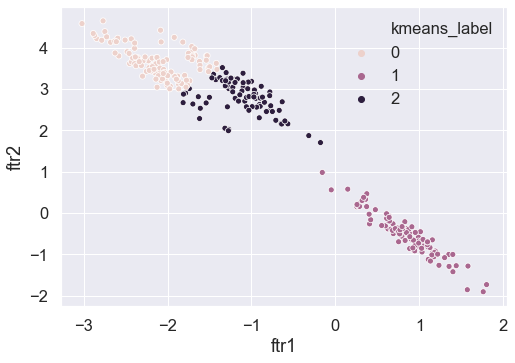

In [55]:
kmean_visualize = sns.scatterplot(cluster_df['ftr1'], cluster_df['ftr2'], hue=cluster_df['kmeans_label'])

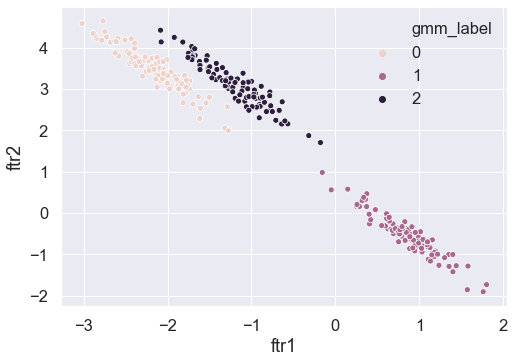

In [56]:
gmm_visualize = sns.scatterplot(cluster_df['ftr1'], cluster_df['ftr2'], hue=cluster_df['gmm_label'])

Text(0.5, 1.0, 'GMM')

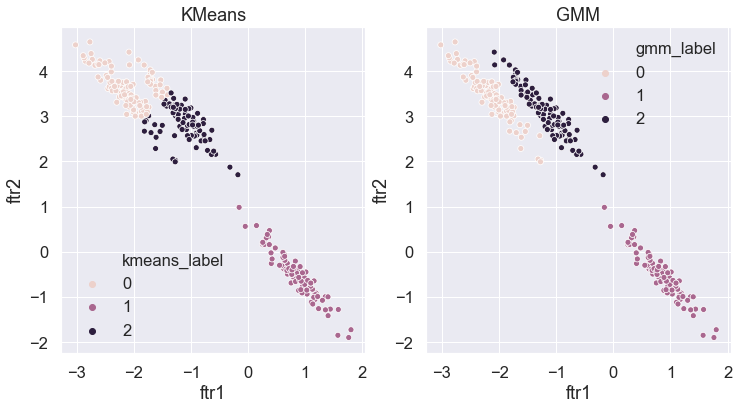

In [59]:
f, ax = plt.subplots(1,2, figsize=(12,6))
sns.scatterplot(cluster_df['ftr1'], cluster_df['ftr2'], hue=cluster_df['kmeans_label'], ax=ax[0])
ax[0].set_title('KMeans')
sns.scatterplot(cluster_df['ftr1'], cluster_df['ftr2'], hue=cluster_df['gmm_label'], ax=ax[1])
ax[1].set_title('GMM')

실루엣 계수만으로는 군집화가 잘되었는지 판단하기가 무척이나 어렵다. 그냥 참고 정도만 하면 될 것 같다.